Chapter3. 의사결정 트리

의사결정 트리는 분류 기술 중 가장 일반적으로 사용되는 방법 중 하나이다. 이는 마치 스무고개 게임처럼 동작하며, 의사결정 트리에게 데이터 묶음을 주면, 그에 맞는 답변을 생성한다.

의사결정 트리의 작업 흐름도(Flowchart)에는 의사결정 영역(사각형: decision blocks)과 단말 영역(타원형: terminating blocks)이 있으며, 이에 의해 어떤 결론에 도달하게 된다. 또한 의사결정 영역에서 오른쪽과 왼쪽으로 뻗어나간 화살표를 가지(branches)라고 하며, 이것들은 다른 의사결정 영역이나 단말 영역과 연결된다.

의사결정 트리를 전체적으로 보면 나무를 뒤집어놓은 것과 같은 모양이다.
아시다시피 초기지점은 root node이고 분기가 거듭될 수록 그에 해당하는 데이터의 개수는 줄어든다.
또한, 각 terminal node에 속하는 데이터의 개수를 합하면 root node의 데이터수와 일치한다. 바꿔 말하면 terminal node 간 교집합이 없다는 뜻이다.
한편 terminal node의 개수가 분리된 집합의 개수이다. 만약, terminal node가 3개라면 전체 데이터가 3개의 부분집합으로 나눠진 셈이다.

KNN은 분류를 위해 많은 작업을 했지만, 의사결정트리는 데이터에 대한 어떠한 통찰력도 요하지 않으며, 분류 결과를 쉽게 이해할 수 있다. 

장점: 계산 비용이 적다, 학습된 결과를 사람이 이해하기 쉬우며 누락된 값(Missing Values)이 있어도 처리할 수 있다. 분류와 관련이 없는 속성이 있어도 처리할 수 있다.

단점: 과적합(Overfitting)되기 쉽다.

적용: 수치형 값, 명목형 값

즉, 의사결정 트리 학습은 트레이닝 데이터를 이용해 데이터를 최적으로 분류해주는 질문들을 학습하는 머신러닝이다.

*정보이득과 엔트로피

*의사결정 트리에서 분기를 나누기 위한 최적의 질문은 정보이득(Information Gain)이라는 값이 최대가 되게 하는 것이다. 정보이득은 데이터 불순도, 즉 데이터가 제대로 분류되지 않고 섞여있는 정도가 적을수록 최대화된다. 

*의사결정 트리에서 불순도를 측정하는 방법은 3가지가 있다. m개의 레코드가 속하는 A라는 영역이 있을 때, K범주에 속할 확률을 pk라고 한다면.

1. 엔트로피(entropy) - Entropy(A)=−∑pk*log2(pk)

2. 지니 인덱스(Gini Index) - G.I(A)=1−∑(pk)^2

3. 분류오류 (Classification error) - C.E(A)=1-max(pk) (미분이 불가능하므로 많이 쓰지지는 않음)

*이러한 방법들을 통해 불순도를 측정하며, 각각의 방법마다 최적의 질문이 달라질 수 있다.

1. python으로 의사결정 트리 알고리즘 만들기

In [20]:
from math import log
import operator

In [21]:
def creatDataSet():
    dataSet = [[1,1,'yes'],
              [1,1,'yes'],
              [1,0,'no'],
              [0,1,'no'],
              [0,1,'no']]
    labels = ['no surfacing','flippers']
    return dataSet, labels

In [22]:
#데이터 집합의 셰넌 엔트로피를 계산하는 함수
def calcshannonEnt(dataSet):
    numEntries = len(dataSet)
    labelCounts = {}
    for featVec in dataset:
        currentLebel = featVec[-1]
        if currentLabel not in lebelCounts.keys():
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1 #가능한 모든 분류에 대한 딕셔너리 생성
    shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key]) / numEntries
        shannonEnt -= prob*log(prob,2) #밑수가 2인 로그
    return shannonEnt

In [23]:
def splitDataSet(dataSet, axis, value):
    retDataSet = [] #분할 리스트 생성
    for featVec in dataSet:
        if featVec[axis] == value:
            reducedFeatVec = featVec[:axis]     #chop out axis used for splitting
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec) #분할한 속성 잘라내기
    return retDataSet

In [24]:
#데이터 분할 수 가장 좋은 속성 선택하기
def chooseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0]) - 1      #the last column is used for the labels
    baseEntropy = calcShannonEnt(dataSet)
    bestInfoGain = 0.0; bestFeature = -1
    for i in range(numFeatures):        #iterate over all the features
        featList = [example[i] for example in dataSet]#create a list of all the examples of this feature
        uniqueVals = set(featList)       #get a set of unique values
        newEntropy = 0.0
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value)
            prob = len(subDataSet)/float(len(dataSet))
            newEntropy += prob * calcShannonEnt(subDataSet)     
        infoGain = baseEntropy - newEntropy     #calculate the info gain; ie reduction in entropy
        if (infoGain > bestInfoGain):       #compare this to the best gain so far
            bestInfoGain = infoGain         #if better than current best, set to best
            bestFeature = i
    return bestFeature                      #returns an integer

In [25]:
#다수결: 알고리즘이 더 이상 분할할 속성이 없거나 하나의 가지에 있는 모든 사례가 전부 같은 분류 항목일 때 멈추게 한다.
def majorityCnt(classList):
    classCount={}
    for vote in classList:
        if vote not in classCount.keys(): classCount[vote] = 0
        classCount[vote] += 1
    sortedClassCount = sorted(classCount.iteritems(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

In [26]:
#트리 만들기 코드
def createTree(dataSet,labels):
    classList = [example[-1] for example in dataSet]
    if classList.count(classList[0]) == len(classList): 
        return classList[0] #stop splitting when all of the classes are equal
    if len(dataSet[0]) == 1: #stop splitting when there are no more features in dataSet
        return majorityCnt(classList)
    bestFeat = chooseBestFeatureToSplit(dataSet)
    bestFeatLabel = labels[bestFeat]
    myTree = {bestFeatLabel:{}}
    del(labels[bestFeat])
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
    for value in uniqueVals:
        subLabels = labels[:]       #copy all of labels, so trees don't mess up existing labels
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value),subLabels)
    return myTree                        

In [27]:
#기존의 의사결정 트리를 위한 분류 함수
def classify(inputTree,featLabels,testVec):
    firstStr = inputTree.keys()[0]
    secondDict = inputTree[firstStr]
    featIndex = featLabels.index(firstStr)
    key = testVec[featIndex]
    valueOfFeat = secondDict[key]
    if isinstance(valueOfFeat, dict): 
        classLabel = classify(valueOfFeat, featLabels, testVec)
    else: classLabel = valueOfFeat
    return classLabel

In [28]:
#pickle을 가지고 의사결정 트리를 유지시키는 방법
def storeTree(inputTree,filename):
    import pickle
    fw = open(filename,'w')
    pickle.dump(inputTree,fw)
    fw.close()

In [29]:
def grabTree(filename):
    import pickle
    fr = open(filename)
    return pickle.load(fr)

2-1.Scikit-learn을 통한 의사결정 트리 실습-cancer dataset 활용

2-1.1. 먼저 Scikit-learn의 모듈을 설치한다.

In [2]:
from IPython.display import display
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
!!pip install mlxtend

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


['Collecting mlxtend',
 '  Downloading https://files.pythonhosted.org/packages/b5/40/daab57161effb451cc2990a9cebe4da68c2a8038e7a5b8d0bc24cccf9da6/mlxtend-0.12.0-py2.py3-none-any.whl (1.3MB)',
 'Requirement already satisfied: numpy>=1.10.4 in /home/nbuser/anaconda3_501/lib/python3.6/site-packages (from mlxtend) (1.14.5)',
 'Requirement already satisfied: setuptools in /home/nbuser/anaconda3_501/lib/python3.6/site-packages (from mlxtend) (40.0.0)',
 'Requirement already satisfied: pandas>=0.17.1 in /home/nbuser/anaconda3_501/lib/python3.6/site-packages (from mlxtend) (0.20.3)',
 'Requirement already satisfied: scipy>=0.17 in /home/nbuser/anaconda3_501/lib/python3.6/site-packages (from mlxtend) (0.19.1)',
 'Requirement already satisfied: scikit-learn>=0.18 in /home/nbuser/anaconda3_501/lib/python3.6/site-packages (from mlxtend) (0.19.1)',
 'Requirement already satisfied: matplotlib>=1.5.1 in /home/nbuser/anaconda3_501/lib/python3.6/site-packages (from mlxtend) (2.1.1)',
 'Requirement alre

In [3]:
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from matplotlib import style
from mlxtend.plotting import plot_decision_regions

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
from sklearn.tree import DecisionTreeClassifier

2-1.2. 우리가 분석할 breast_cancer의 데이터 구조를 확인한다.

In [11]:
from sklearn.datasets import load_breast_cancer

In [13]:
cancer = load_breast_cancer()
print(cancer)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [17]:
print(cancer.data)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [18]:
print(cancer.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

확인한 결과, cancer.data는 암에 대한 정보가, cancer.target은 이 암이 양성인지 악성인지에 대해 나와있다. 즉, 우리는 이 cancer.data를 통해
이 암이 양성인지, 음성인지를 의사결정 트리로 예측할 것이다.

2-1.3. 예측기 만들어 예측하기.

X를 cancer.data, y를 cancer.target으로 두고 train set과 test set을 나누어 예측을 진행한다.

In [64]:
cancer = datasets.load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42) #cancer.target을 기준으로 층화 샘플링
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
tree.fit(X_train,y_train) #X_train과 y_train을 이용해 머신러닝 수행
print("훈련 세트 정확도:%.3f" %(tree.score(X_train,y_train)))
print("테스트 세트 정확도:%.3f" %(tree.score(X_test,y_test)))

훈련 세트 정확도:1.000
테스트 세트 정확도:0.944


In [65]:
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
tree.fit(X_train,y_train)
print("훈련 세트 정확도:%.3f" %(tree.score(X_train,y_train)))
print("테스트 세트 정확도:%.3f" %(tree.score(X_test,y_test)))

훈련 세트 정확도:1.000
테스트 세트 정확도:0.959


결정 트리의 깊이를 제한하지 않으면 트리는 무한정 깊어지고 복잡해 질 수 있다. 또한 과적합되고 새로운 데이터에 잘 맞지 않을 위험도 존재한다.
따라서 이를 방지하기 위해 트리의 깊이를 제한하여 '가지치기'를 한다.

In [66]:
cancer = datasets.load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42) #cancer.target을 기준으로 층화 샘플링
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 0)
tree.fit(X_train,y_train)
print("훈련 세트 정확도:%.3f" %(tree.score(X_train,y_train)))
print("테스트 세트 정확도:%.3f" %(tree.score(X_test,y_test)))

훈련 세트 정확도:0.967
테스트 세트 정확도:0.951


In [5]:
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 0)
tree.fit(X_train,y_train)
print("훈련 세트 정확도:%.3f" %(tree.score(X_train,y_train)))
print("테스트 세트 정확도:%.3f" %(tree.score(X_test,y_test)))

훈련 세트 정확도:0.980
테스트 세트 정확도:0.965


이러한 '가지치기'를 통해 과적합을 줄일 수 있다. 비록 훈련 세트의 정확도는 줄어들지만 테스트 세트의 정확도는 커지게 할 수 있다.

In [1]:
from sklearn.tree import export_graphviz

In [6]:
export_graphviz(tree, out_file = "tree.dot", class_names = ["악성","양성"],
               feature_names = cancer.feature_names,
               impurity = False, filled = True)

In [7]:
import graphviz

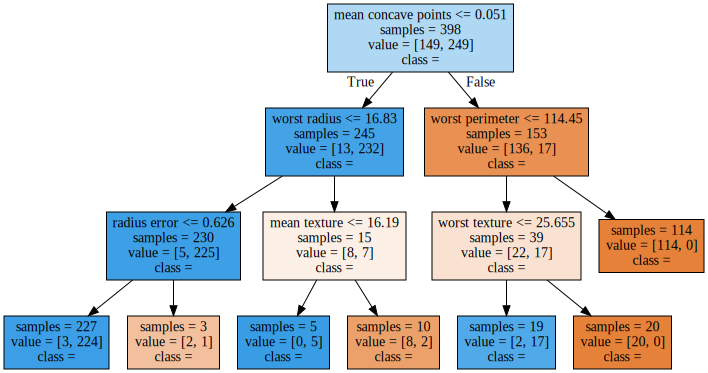

In [9]:
with open ("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

위와 같이 시각화 할 수 있습니다!!! 위 그림의 sample는 각 노드에 있는 샘플의 수를 의미하고, value는 클래스당 샘플의 수를 나타냅니다. 

트리의 특성 중요도를 살펴본다면 이러한 결과가 나옵니다. 

In [11]:
print(tree.feature_importances_)

[0.         0.02291424 0.         0.         0.         0.
 0.         0.67967722 0.         0.         0.02659086 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.06997852 0.08686287 0.11397628 0.
 0.         0.         0.         0.         0.         0.        ]


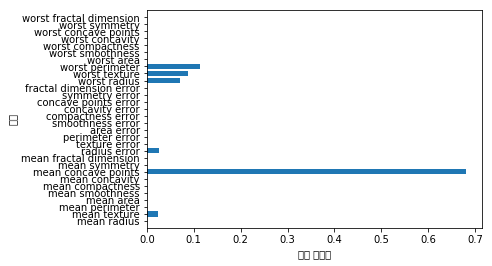

In [15]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features),model.feature_importances_, align = 'center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1,n_features)
plot_feature_importances_cancer(tree)

첫번째 노드에서 사용한 특성인 mean concave points가 가장 중요한 특성으로 결정되었으며, 이는 데이터를 잘 분할한 것으로 나타난다. 

2-2.Scikit-learn을 통한 의사결정 트리 실습-iris dataset 활용

2-2.1.우리가 분석할 breast_cancer의 데이터 구조를 확인한다.

In [25]:
from sklearn.datasets import load_iris

In [26]:
iris = load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [27]:
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [28]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [62]:
def iris_decisiontree():
    iris = datasets.load_iris()
    X = iris.data[:,[2,3]]
    y = iris.target

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)
    
    sc = StandardScaler()
    sc.fit(X_train) #X_train의 평균과 표준편차를 구함
    X_train_std = sc.transform(X_train) #트레이닝 데이터 표준화
    X_test_std = sc.transform(X_test) #테스트 데이터 표준화
    
    ml = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 0)
    
    ml.fit(X_train_std,y_train)
    y_pred = ml.predict(X_test_std) #학습을 수행한 이후 X_test를 이용해 예측값을 만들고, 이를 y_pred에 저장한다.
    print('총 데이터 개수:%d' %(len(y_test)))
    print('오류갯수:%d' %(y_test != y_pred).sum())
    print('정확도:%.2f' %(accuracy_score(y_test,y_pred)))
    
    X_combined_std = np.vstack((X_train_std,X_test_std))
    y_combined = np.hstack((y_train,y_test))
    plot_decision_regions(X = X_combined_std, y = y_combined, clf = ml) #시각화

총 데이터 개수:45
오류갯수:1
정확도:0.98


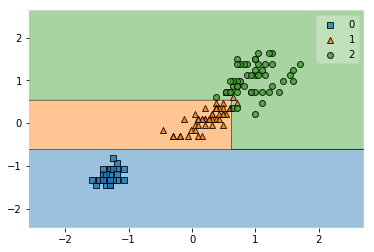

In [63]:
iris_decisiontree()

In [60]:
def iris_decisiontree1():
    iris = datasets.load_iris()
    X = iris.data[:,[2,3]]
    y = iris.target

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

    ml = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 0)
    
    ml.fit(X_train,y_train)
    y_pred = ml.predict(X_test) #학습을 수행한 이후 X_test를 이용해 예측값을 만들고, 이를 y_pred에 저장한다.
    print('총 데이터 개수:%d' %(len(y_test)))
    print('오류갯수:%d' %(y_test != y_pred).sum())
    print('정확도:%.2f' %(accuracy_score(y_test,y_pred)))
    
    X_combined = np.vstack((X_train,X_test))
    y_combined = np.hstack((y_train,y_test))
    plot_decision_regions(X = X_combined, y = y_combined, clf = ml) #시각화

총 데이터 개수:45
오류갯수:1
정확도:0.98


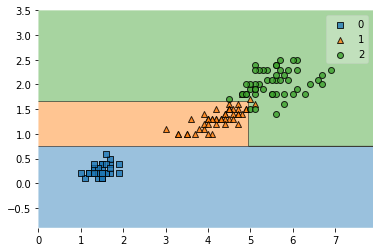

In [61]:
iris_decisiontree1()